In [20]:
import copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import floresta as flt
from nltk.corpus import machado as mch
from nltk.corpus import mac_morpho as mcm

from utils import load_six_emotions, load_valence_emotions_from_oplexicon, load_valence_emotions_from_sentilex, generate_corpus
from unsupervised.emotional_lsa import EmotionalLSA

%matplotlib inline

In [5]:
with open('/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/frases.txt') as h:
    original_phrases = h.readlines()
original_phrases = original_phrases[:25]
phrases = copy.deepcopy(original_phrases)
# phrases += [' '.join(f).replace('_', ' ') for f in flt.sents()[:2000]]
# phrases += [' '.join(f).replace('_', ' ') for f in mch.sents()[:2000]]
# phrases += [' '.join(f).replace('_', ' ') for f in mcm.sents()[:2000]]

# original_phrases = []
# sents = []
# filename = '/home/rdenadai/programas/vagrant_img/vagrant.machine.puphpet/projetos/github/sentiment-analysis-2018-president-election/dataset/tweets-tratados-polaridade-10-10-2018.csv'
# with open(filename, 'r') as h:
#     tweets = h.readlines()
#     for tweet in tweets[1:70]:
#         rep = ['\n', '"', '@']
#         for r in rep:
#             tweet = tweet.replace(r, '')
#         infos = tweet.split('|')
#         print(infos)
#         original_phrases += [infos[1].strip()]
#         sents += [infos[2].strip()]

# phrases = copy.deepcopy(original_phrases)
# print(phrases)
# print(sents)
phrases = generate_corpus(phrases)
ldocs = [f'D{i}' for i in range(len(original_phrases))]

Iniciando processamento...
Filtro e finalização...
Finalizado...


In [51]:
print('Loading emotional words: ')
emotion_words = load_six_emotions('/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/emocoes')
emotion_words_n = load_valence_emotions_from_oplexicon('/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/emocoes/oplexicon_v3.0/lexico_v3.0.txt')
emotion_words['NEUTRO'] = emotion_words_n['NEUTRO']

print('Starting EmotionalLSA model...')
model = EmotionalLSA(debug=True)
print('fit and transform...')
predicted = model.fit_transform(phrases, emotion_words)

Loading emotional words: 
Starting EmotionalLSA model...
fit and transform...
Count:
Actual number of features: 119
Processing emotional state... this may take a while...


In [52]:
df = pd.DataFrame(predicted[:len(original_phrases)], index=ldocs, columns=emotion_words.keys())

D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

D1 - "A religiao é o que impede o pobre de matar o rico.

D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

D4 - A adolescência é como uma casa em dia de mudanças: Uma desordem temporária.

D5 - A adversidade desperta em nós capacidades que, em circunstâncias favoráveis, teriam ficado adormecidas.

D6 - A adversidade põe à prova os espíritos.

D7 - A adversidade restitui aos homens todas as virtudes que a prosperidade lhes tira.



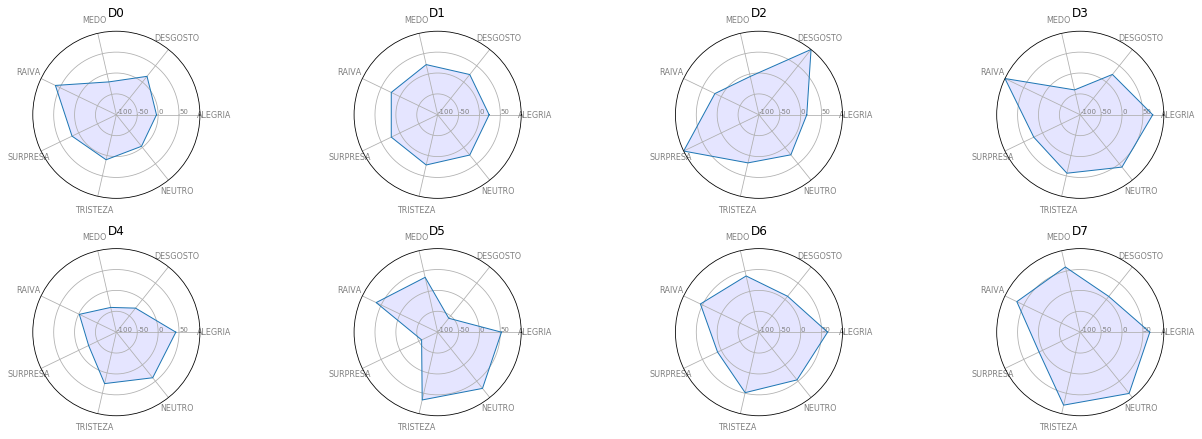

In [53]:
categories = list(df)
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(18, 12))
for m in range(8):
    idx = m + 1
    
    values = df.loc[f'D{m}'].values
    values = np.append(values, values[0])
    print(f'D{m} - {original_phrases[m]}')
    # Initialise the spider plot
    ax = plt.subplot(4, 4, idx, polar=True)
    # Title
    plt.title(f'D{m}')
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(range(-100, 100, 50), [f'{i}' for i in range(-100, 100, 50)], color="grey", size=7)
    plt.ylim(-100, 100)
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

plt.tight_layout()
plt.show()

In [54]:
for i, frase in enumerate(original_phrases):
    print('-' * 20)
    print(f'D{i} - {frase}')
    print(df.loc[f'D{i}'])

--------------------
D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

ALEGRIA     -3.93
DESGOSTO    17.73
MEDO       -19.26
RAIVA       61.92
SURPRESA    17.73
TRISTEZA    10.41
NEUTRO      -3.52
Name: D0, dtype: float64
--------------------
D1 - "A religiao é o que impede o pobre de matar o rico.

ALEGRIA     23.22
DESGOSTO    23.22
MEDO        23.22
RAIVA       23.22
SURPRESA    23.22
TRISTEZA    23.22
NEUTRO      23.22
Name: D1, dtype: float64
--------------------
D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

ALEGRIA      14.46
DESGOSTO    100.00
MEDO         -5.94
RAIVA        17.01
SURPRESA    100.00
TRISTEZA     18.06
NEUTRO       22.51
Name: D2, dtype: float64
--------------------
D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

ALEGRIA      73.40
DESGOSTO     23.47
MEDO        -38.92
RAIVA       100.00
SURPRESA     23.47
TRISTEZA    

In [55]:
print('Loading emotional words: ')
emotion_words = load_valence_emotions_from_oplexicon('/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/emocoes/oplexicon_v3.0/lexico_v3.0.txt')

print('Starting EmotionalLSA model...')
model = EmotionalLSA(debug=True)
print('fit and transform...')
predicted = model.fit_transform(phrases, emotion_words)
    
size = len(original_phrases)
df = pd.DataFrame(predicted[:size], index=ldocs, columns=emotion_words.keys())

Loading emotional words: 
Starting EmotionalLSA model...
fit and transform...
Count:
Actual number of features: 119
Processing emotional state... this may take a while...


D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

D1 - "A religiao é o que impede o pobre de matar o rico.

D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

D4 - A adolescência é como uma casa em dia de mudanças: Uma desordem temporária.

D5 - A adversidade desperta em nós capacidades que, em circunstâncias favoráveis, teriam ficado adormecidas.

D6 - A adversidade põe à prova os espíritos.

D7 - A adversidade restitui aos homens todas as virtudes que a prosperidade lhes tira.



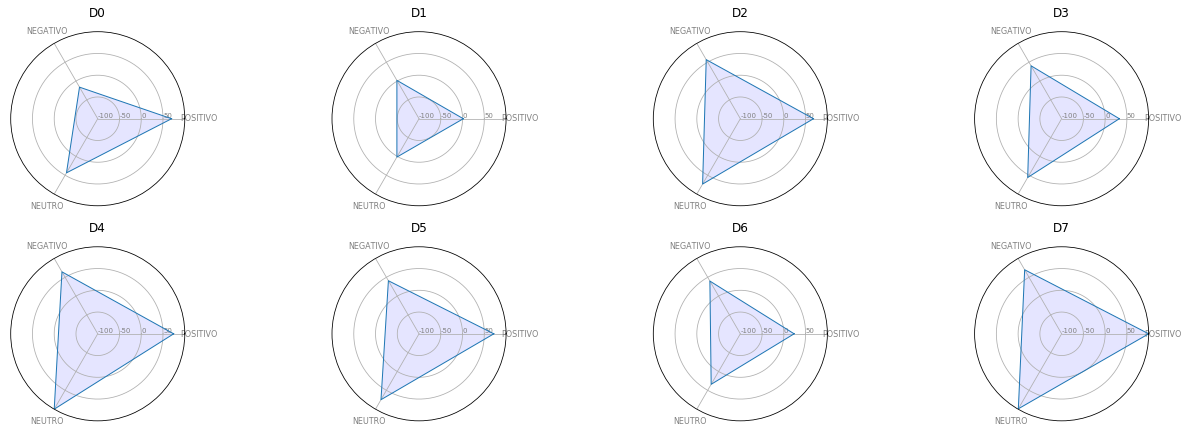

In [56]:
categories = list(df)
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(18, 12))
for m in range(8):
    idx = m + 1
    
    values = df.loc[f'D{m}'].values
    values = np.append(values, values[0])
    print(f'D{m} - {original_phrases[m]}')
    # Initialise the spider plot
    ax = plt.subplot(4, 4, idx, polar=True)
    # Title
    plt.title(f'D{m}')
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(range(-100, 100, 50), [f'{i}' for i in range(-100, 100, 50)], color="grey", size=7)
    plt.ylim(-100, 100)
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

plt.tight_layout()
plt.show()

In [57]:
for i, frase in enumerate(original_phrases):
    print('-' * 20)
    print(f'D{i} - {frase}')
    print(df.loc[f'D{i}'])

--------------------
D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

POSITIVO    69.72
NEGATIVO   -16.24
NEUTRO      43.63
Name: D0, dtype: float64
--------------------
D1 - "A religiao é o que impede o pobre de matar o rico.

POSITIVO    1.75
NEGATIVO    1.75
NEUTRO      1.75
Name: D1, dtype: float64
--------------------
D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

POSITIVO    68.10
NEGATIVO    56.78
NEUTRO      73.37
Name: D2, dtype: float64
--------------------
D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

POSITIVO    32.58
NEGATIVO    40.42
NEUTRO      56.00
Name: D3, dtype: float64
--------------------
D4 - A adolescência é como uma casa em dia de mudanças: Uma desordem temporária.

POSITIVO     74.49
NEGATIVO     64.39
NEUTRO      100.00
Name: D4, dtype: float64
--------------------
D5 - A adversidade desperta em nós capacidades q

In [26]:
print('Loading emotional words: ')
emotion_words = load_valence_emotions_from_sentilex(
        '/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/emocoes/SentiLex-PT02/SentiLex-flex-PT02.txt')

print('Starting EmotionalLSA model...')
model = EmotionalLSA(debug=True)
print('fit and transform...')
predicted = model.fit_transform(phrases, emotion_words)

size = len(original_phrases)
df = pd.DataFrame(predicted[:size], index=ldocs, columns=emotion_words.keys())

Loading emotional words: 
Starting EmotionalLSA model...
fit and transform...
Count:
Actual number of features: 119
Processing emotional state... this may take a while...


D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

D1 - "A religiao é o que impede o pobre de matar o rico.

D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

D4 - A adolescência é como uma casa em dia de mudanças: Uma desordem temporária.

D5 - A adversidade desperta em nós capacidades que, em circunstâncias favoráveis, teriam ficado adormecidas.

D6 - A adversidade põe à prova os espíritos.

D7 - A adversidade restitui aos homens todas as virtudes que a prosperidade lhes tira.



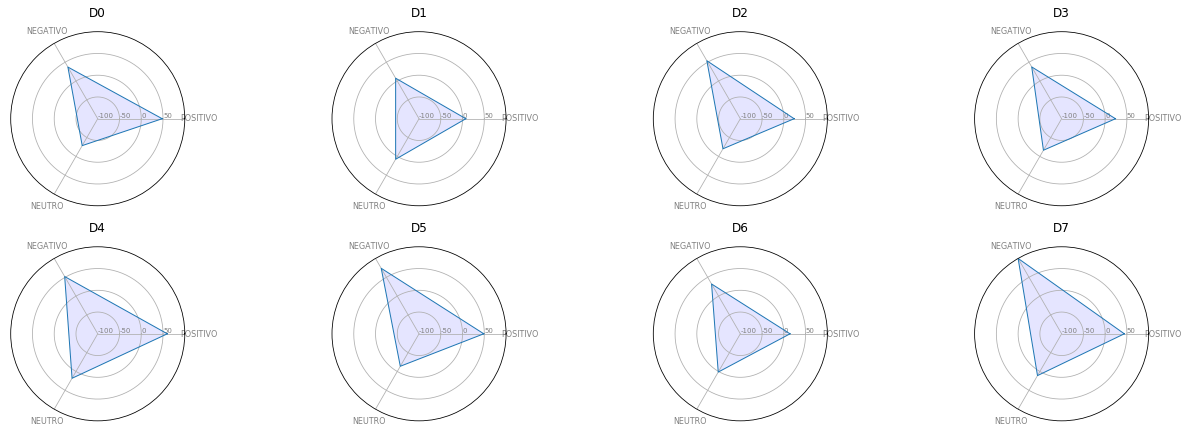

In [46]:
categories = list(df)
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(18, 12))
for m in range(8):
    idx = m + 1
    
    values = df.loc[f'D{m}'].values
    values = np.append(values, values[0])
    print(f'D{m} - {original_phrases[m]}')
    # Initialise the spider plot
    ax = plt.subplot(4, 4, idx, polar=True)
    # Title
    plt.title(f'D{m}')
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(range(-100, 100, 50), [f'{i}' for i in range(-100, 100, 50)], color="grey", size=7)
    plt.ylim(-100, 100)
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

plt.tight_layout()
plt.show()

In [14]:
for i, frase in enumerate(original_phrases):
    print('-' * 20)
    print(f'D{i} - {frase}')
    print(df.loc[f'D{i}'])

Loading emotional words: 
Starting EmotionalLSA model...
fit and transform...
Count:
Actual number of features: 119
Processing emotional state... this may take a while...
--------------------
D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

POSITIVO    47.39
NEGATIVO    31.21
NEUTRO     -20.74
Name: D0, dtype: float64
--------------------
D1 - "A religiao é o que impede o pobre de matar o rico.

POSITIVO    2.14
NEGATIVO    2.14
NEUTRO      2.14
Name: D1, dtype: float64
--------------------
D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

POSITIVO    27.59
NEGATIVO    60.21
NEUTRO     -15.27
Name: D2, dtype: float64
--------------------
D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

POSITIVO    15.41
NEGATIVO    29.34
NEUTRO     -11.68
Name: D3, dtype: float64
--------------------
D4 - A adolescência é como uma casa em dia de mudanças: Uma de